In [1]:
import pandas as pd
import matplotlib.pyplot  as plt
import numpy as np
import seaborn as sns

train_df = pd.read_csv('train_fwYjLYX.csv')
test_df  = pd.read_csv('test_1eLl9Yf.csv')

train = train_df.copy()
test = test_df.copy()

In [2]:
print(train_df.head())
print(test_df.head())

  application_date  segment  branch_id        state  zone  case_count
0       2017-04-01        1        1.0  WEST BENGAL  EAST        40.0
1       2017-04-03        1        1.0  WEST BENGAL  EAST         5.0
2       2017-04-04        1        1.0  WEST BENGAL  EAST         4.0
3       2017-04-05        1        1.0  WEST BENGAL  EAST       113.0
4       2017-04-07        1        1.0  WEST BENGAL  EAST        76.0
   id application_date  segment
0   1       2019-07-06        1
1   2       2019-07-07        1
2   3       2019-07-08        1
3   4       2019-07-09        1
4   5       2019-07-10        1


In [3]:
print(train_df.shape)
print(test_df.shape)

(80402, 6)
(180, 3)


In [4]:
train_df[train_df.segment==1].case_count.describe()

count    66898.000000
mean        32.707106
std         61.591868
min          0.000000
25%          0.000000
50%         14.000000
75%         38.000000
max       1890.000000
Name: case_count, dtype: float64

In [5]:
train_df[train_df.segment==2].case_count.describe()

count    13504.000000
mean       942.318646
std       1624.339623
min          0.000000
25%         54.000000
50%        371.000000
75%       1033.000000
max      13787.000000
Name: case_count, dtype: float64

In [6]:
train_df['application_date'] = pd.to_datetime(train_df['application_date'], format="%Y-%m-%d")
test_df['application_date'] = pd.to_datetime(test_df['application_date'], format="%Y-%m-%d")


In [7]:
from statsmodels.tsa.stattools import adfuller
def test_stationarity(timeseries):
    
    #Determing rolling statistics
    rolmean = timeseries.rolling(window=12).mean()
    rolstd = timeseries.rolling(window=12).std()

    #Plot rolling statistics:
    fig = plt.figure(figsize=(12, 8))
    orig = plt.plot(timeseries, color='blue',label='Original')
    mean = plt.plot(rolmean, color='orange', label='Rolling Mean')
    std = plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show()
    
    #Perform Dickey-Fuller test:
    print('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print(dfoutput)

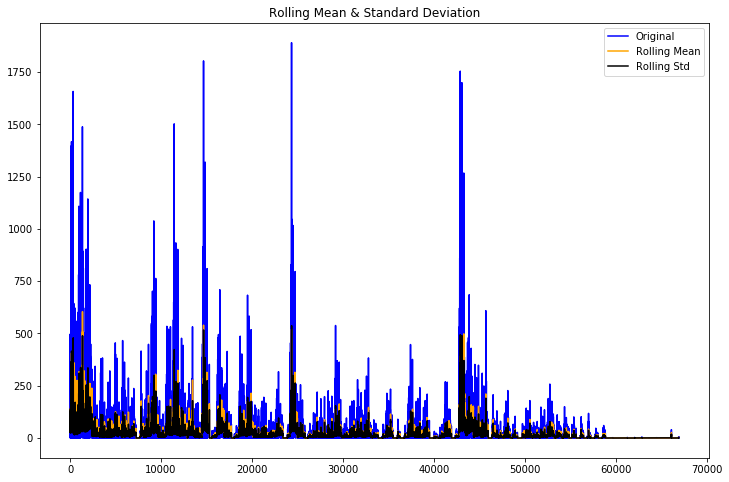

Results of Dickey-Fuller Test:
Test Statistic                -8.817436e+00
p-value                        1.917340e-14
#Lags Used                     6.200000e+01
Number of Observations Used    6.683500e+04
Critical Value (1%)           -3.430448e+00
Critical Value (5%)           -2.861583e+00
Critical Value (10%)          -2.566793e+00
dtype: float64


In [8]:
test_stationarity(train_df[train_df.segment==1].case_count)

In [9]:
train_df['year'] = train_df['application_date'].dt.year
train_df['month'] = train_df['application_date'].dt.month
train_df['day'] = train_df['application_date'].dt.dayofyear


In [10]:
test_df['year'] = test_df['application_date'].dt.year
test_df['month'] = test_df['application_date'].dt.month
test_df['day'] = test_df['application_date'].dt.dayofyear

E:\Anaconda\lib\site-packages\pandas\plotting\_matplotlib\converter.py:103: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


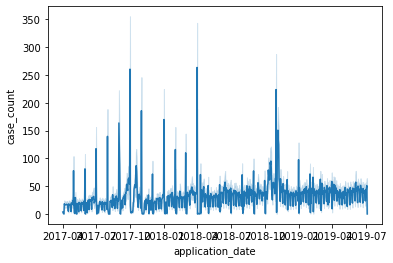

In [11]:
sns.lineplot(x="application_date", y="case_count",legend = 'full' , data=train_df[train_df.segment==1])


In [12]:
train_df = train_df.set_index('application_date')
train_df['case_count'] = train_df['case_count'].astype(float)
train_df.head()

,segment,branch_id,state,zone,case_count,year,month,day
application_date,,,,,,,,
2017-04-01,1,1.0,WEST BENGAL,EAST,40.0,2017,4,91
2017-04-03,1,1.0,WEST BENGAL,EAST,5.0,2017,4,93
2017-04-04,1,1.0,WEST BENGAL,EAST,4.0,2017,4,94
2017-04-05,1,1.0,WEST BENGAL,EAST,113.0,2017,4,95
2017-04-07,1,1.0,WEST BENGAL,EAST,76.0,2017,4,97


<Figure size 432x288 with 0 Axes>

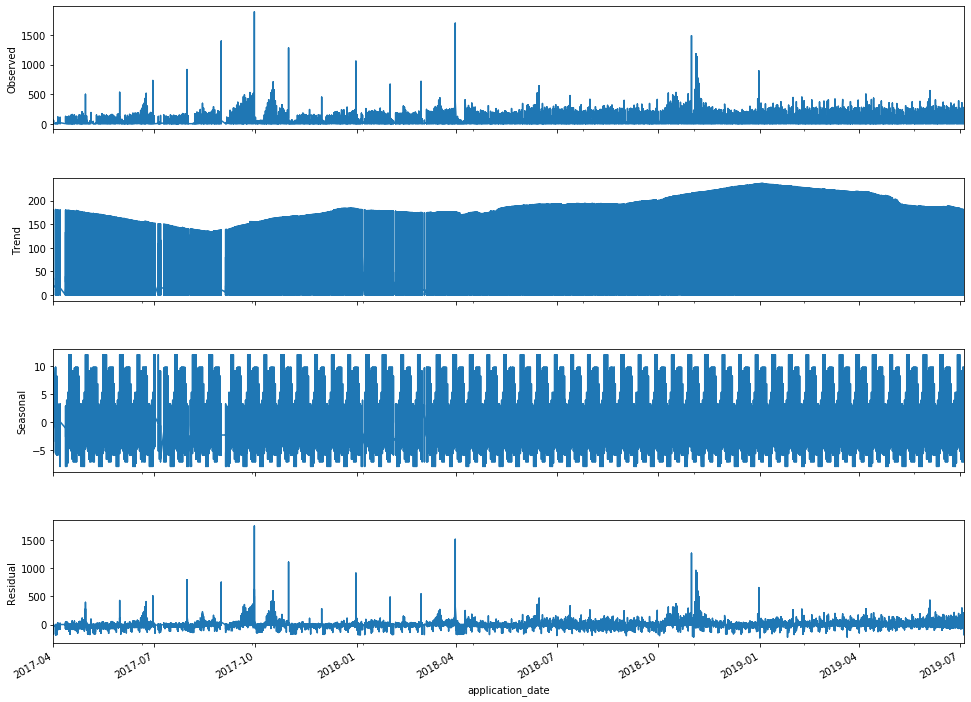

In [13]:
from statsmodels.tsa.seasonal import seasonal_decompose
result = seasonal_decompose(train_df[train_df.segment==1].case_count, model='additive', freq=365)

fig = plt.figure()  
fig = result.plot()  
fig.set_size_inches(15, 12)

In [14]:
from statsmodels.tsa.stattools import adfuller
from numpy import log
result = adfuller(train_df.case_count.dropna())
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])

ADF Statistic: -5.891116
p-value: 0.000000


In [15]:
train = train_df[train_df.segment==1]
#test = test_df[train_df.segment==1]

train.drop(['segment','branch_id','state','zone','year','month','day'],axis=1,inplace=True)
#test.drop(['segment','year','month','day'],axis=1,inplace=True)

E:\Anaconda\lib\site-packages\pandas\core\frame.py:4102: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


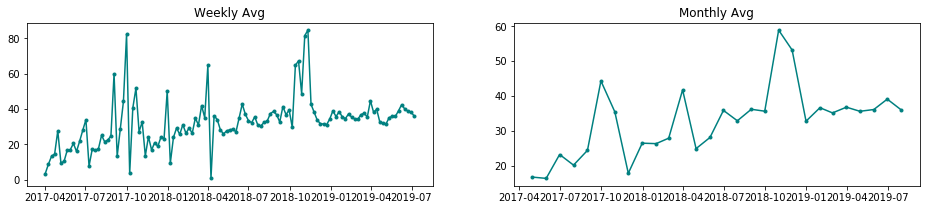

In [16]:
weekly= train.resample('W').apply(np.mean)
monthly = train.resample('M').apply(np.mean)
plt.figure(figsize=(16,3))
plt.subplot(121)
plt.title('Weekly Avg')
plt.plot(weekly.case_count, "-o", markersize=3, color='teal')
plt.subplot(122)
plt.title('Monthly Avg')
plt.plot(monthly.case_count, "-o", markersize=3, color='teal')

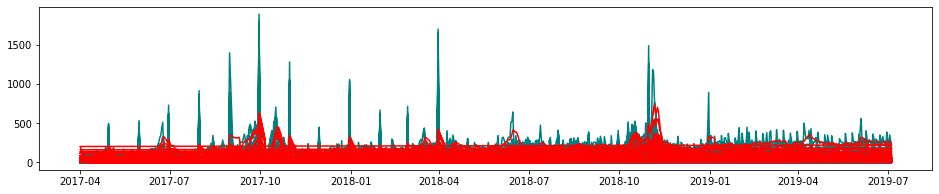

In [17]:
rolling_mean = train.case_count.rolling(window=7, center=False).mean() #window of 7 (weekly avg) captures our data better 
plt.figure(figsize=(16,3))
plt.plot(train.case_count, color='teal')
plt.plot(rolling_mean, 'red')

E:\Anaconda\lib\site-packages\ipykernel_launcher.py:5: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  """


Text(0, 0.5, 'Autocorrelation')

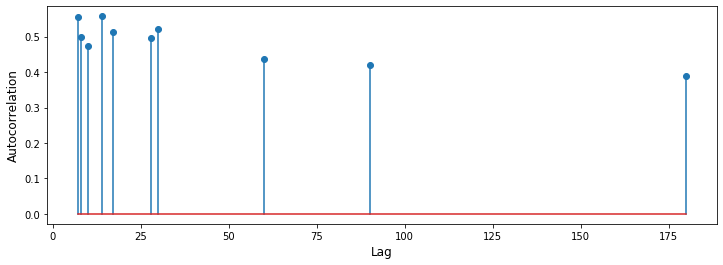

In [18]:
lags = [7, 8, 10, 14, 17, 28, 30, 60, 90, 180] 
autocorrs = [train.case_count.autocorr(lag=lag) 
                   for lag in lags]
plt.figure(figsize=(12, 4))
plt.stem(lags, autocorrs)
plt.xlabel("Lag", fontsize=12)
plt.ylabel("Autocorrelation", fontsize=12)

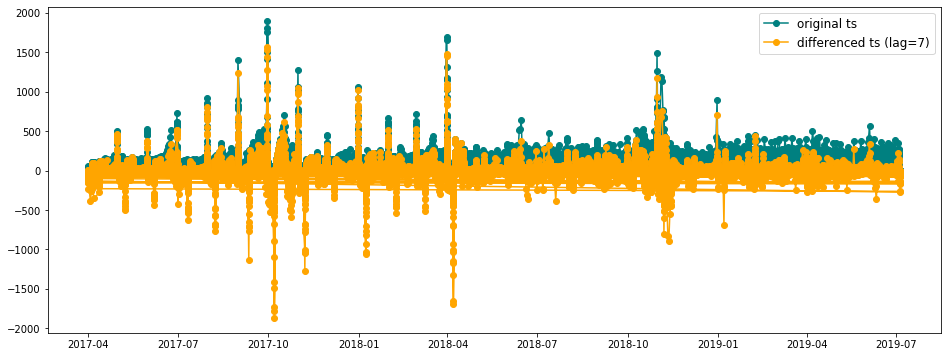

In [19]:
plt.figure(figsize=(16, 6))
plt.plot(train.case_count, '-o', color='teal', label="original ts")
plt.plot(train.case_count.diff(7), '-o', color='orange', label="differenced ts (lag=7)")
plt.legend(fontsize=12)

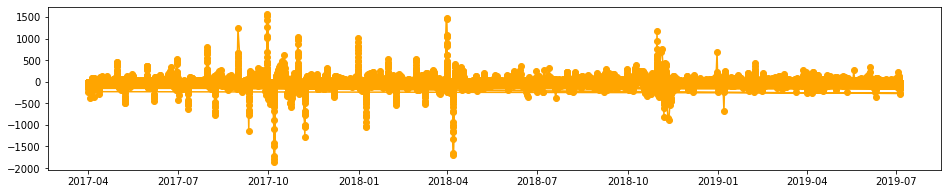

In [20]:
prices = train.case_count
price_diff = prices.diff(7).dropna() 

plt.figure(figsize=(16,3))
plt.plot(price_diff, "-o", color='orange')

In [21]:
def organize_data(to_forecast, window, horizon=1):
    
    shape = to_forecast.shape[:-1] + (to_forecast.shape[-1] - window + 1, window)
    strides = to_forecast.strides + (to_forecast.strides[-1],)
    X = np.lib.stride_tricks.as_strided(to_forecast,
                                        shape=shape,
                                        strides=strides)
    y = np.array([X[i+horizon][-1] for i in range(len(X)-horizon)])
    return X[:-horizon], y

lag = 90
X, y = organize_data(price_diff, lag)

E:\Anaconda\lib\site-packages\ipykernel_launcher.py:4: FutureWarning: Series.strides is deprecated and will be removed in a future version
  after removing the cwd from sys.path.


MAE = 15.262
MAE2 = 0.435


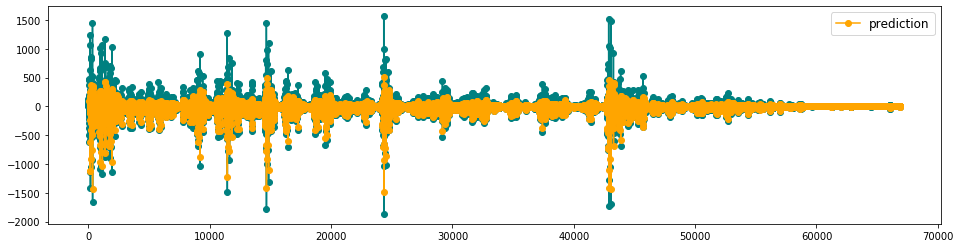

In [22]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error
lr = LinearRegression()
lr_fit = lr.fit(X, y)
lr_prediction = lr_fit.predict(X)

plt.figure(figsize=(16, 4))
plt.plot(price_diff.values, '-o', color='teal')
plt.plot(np.arange(lag, len(price_diff)), lr_prediction, '-o', label='prediction', color='orange')
plt.legend(fontsize=12);

print('MAE = {0:.3f}'.format(mean_absolute_error(price_diff[lag:], lr_prediction)))
print('MAE2 = {0:.3f}'.format(mean_absolute_error(price_diff[-90:], lr_prediction[-90:]))) #for the last 90 days only

In [23]:
from statsmodels.api import tsa


In [24]:
ar = tsa.AR(price_diff)
optlag = ar.select_order(91, ic='aic') 
print("Best optimal lag for ar model: {}".format(optlag))

E:\Anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


Best optimal lag for ar model: 91


E:\Anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


MAE = 15.727
MAE2 = 0.419


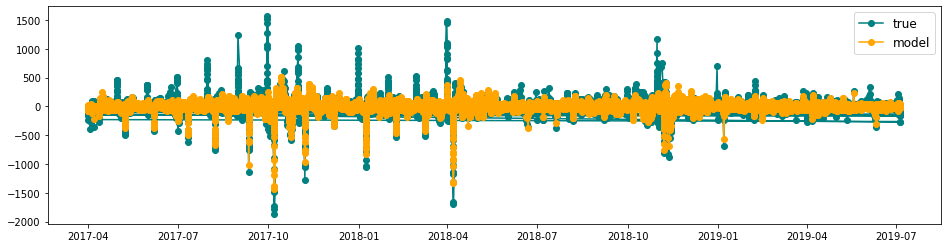

In [25]:
lag = 47 
ar = tsa.AR(price_diff)
ar_fit = ar.fit(maxlag=lag, ic='aic')
ar_prediction = ar_fit.predict(start=lag)

plt.figure(figsize=(16, 4))
plt.plot(price_diff, '-o', label='true', color='teal')
plt.plot(ar_prediction, '-o', label='model', color='orange')
plt.legend(fontsize=12);

print('MAE = {0:.3f}'.format(mean_absolute_error(price_diff[lag:], ar_prediction)))
print('MAE2 = {0:.3f}'.format(mean_absolute_error(price_diff[-90:], ar_prediction[-90:]))) #error only for the last 90 days

In [26]:
base = pd.concat([train,train.shift(1)],axis=1)

In [27]:
base.columns = ['Actual_case_count','Forecast_case_count']

In [28]:
base.dropna(inplace=True)

In [29]:
base.head()

,Actual_case_count,Forecast_case_count
application_date,,
2017-04-03,5.0,40.0
2017-04-04,4.0,5.0
2017-04-05,113.0,4.0
2017-04-07,76.0,113.0
2017-04-12,123.0,76.0


In [30]:
error = mean_squared_error(base.Actual_case_count,base.Forecast_case_count)
error

3182.2826135701152

In [31]:
np.sqrt(error)

56.41172407904332

E:\Anaconda\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


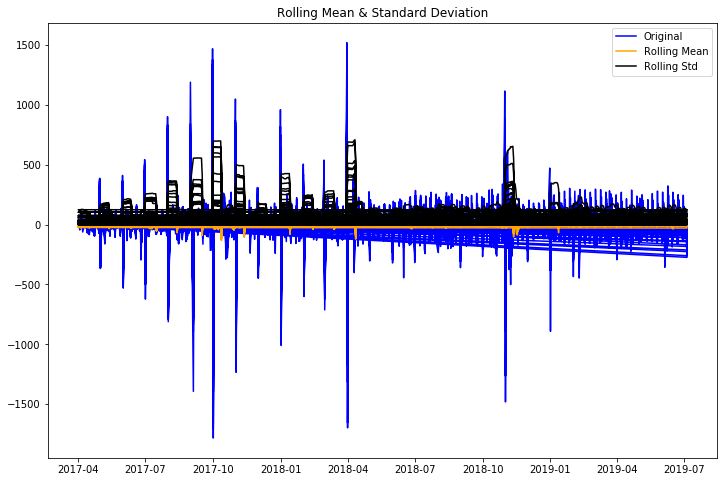

Results of Dickey-Fuller Test:
Test Statistic                   -46.701769
p-value                            0.000000
#Lags Used                        62.000000
Number of Observations Used    66834.000000
Critical Value (1%)               -3.430448
Critical Value (5%)               -2.861583
Critical Value (10%)              -2.566793
dtype: float64


In [32]:
# first difference
train['diff'] = train.case_count - train.case_count.shift(1)  
test_stationarity(train['diff'].dropna(inplace=False))

In [33]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf

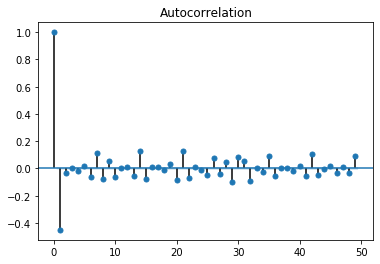

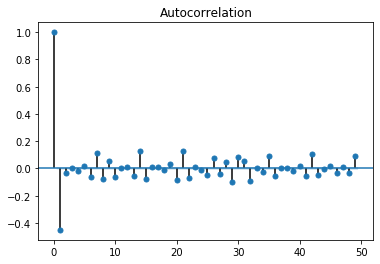

In [34]:
plot_acf(train['diff'][1:])

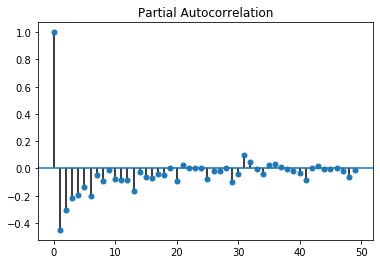

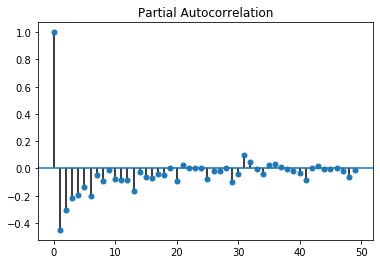

In [35]:
plot_pacf(train['diff'][1:])

In [36]:
train['case_count_float'] = train['case_count'].astype(float)


E:\Anaconda\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [37]:
from statsmodels.tsa.arima_model import ARIMA

base_train = base[0:70]
base_test = base[70:100]

E:\Anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


                              ARMA Model Results                              
Dep. Variable:       case_count_float   No. Observations:                66898
Model:                     ARMA(1, 0)   Log Likelihood             -356829.274
Method:                       css-mle   S.D. of innovations             50.149
Date:                Thu, 20 Feb 2020   AIC                         713664.547
Time:                        08:36:07   BIC                         713691.880
Sample:                             0   HQIC                        713672.995
                                                                              
                             coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                     32.7071      0.462     70.757      0.000      31.801      33.613
ar.L1.case_count_float     0.5806      0.003    184.425      0.000       0.574       0.587
    

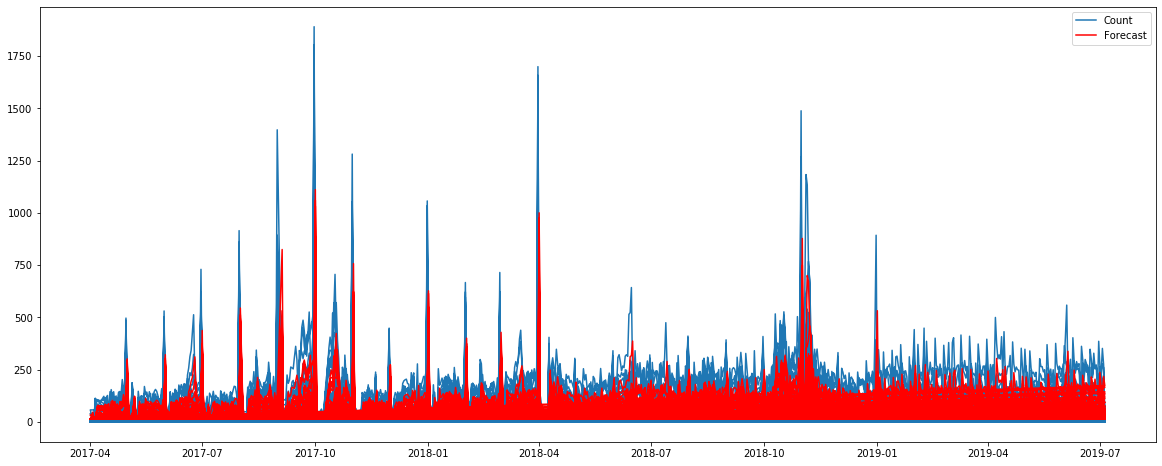

In [38]:
fig = plt.figure(figsize=(20,8))
model = ARIMA(train['case_count_float'], order=(1,0,0)) 
ax = plt.gca()
results = model.fit() 
plt.plot(train.case_count)
plt.plot(results.fittedvalues, color='red')
ax.legend(['Count', 'Forecast'])

print(results.summary())

E:\Anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


                              ARMA Model Results                              
Dep. Variable:       case_count_float   No. Observations:                66898
Model:                     ARMA(1, 1)   Log Likelihood             -347675.281
Method:                       css-mle   S.D. of innovations             43.735
Date:                Thu, 20 Feb 2020   AIC                         695358.563
Time:                        08:36:52   BIC                         695395.006
Sample:                             0   HQIC                        695369.826
                                                                              
                             coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                     32.7770      3.675      8.919      0.000      25.574      39.979
ar.L1.case_count_float     0.9955      0.000   2408.199      0.000       0.995       0.996
ma.L

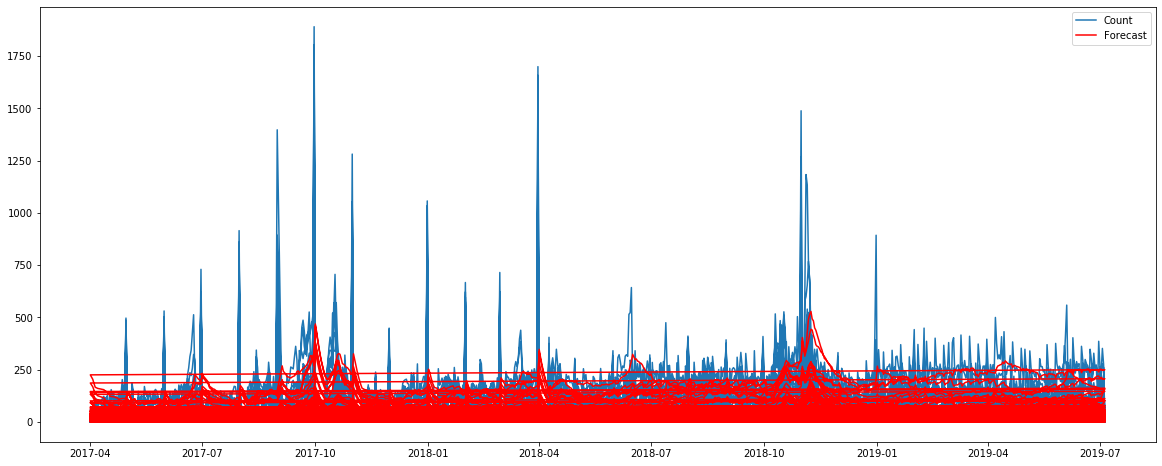

In [39]:
fig = plt.figure(figsize=(20,8))
model = ARIMA(train['case_count_float'], order=(1,0,1)) 
ax = plt.gca()
results = model.fit() 
plt.plot(train.case_count)
plt.plot(results.fittedvalues, color='red')
ax.legend(['Count', 'Forecast'])

print(results.summary())